# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chosen "TMDb movie" dataset for my project. This dataset consists of 21 columns (variables) including "budget", "revenue","orginal_title", "cast","director" etc and provides comprehensive information about over 10,000 movies.  

I selected **"budget"** and **"revenue"** as first variable set in my analysis to identify the movie that has made most profit. The question posed regarding this is : <br>
**1) Which movie made the most profit?**

Secondly, I chose **"budget"** and **"release_year"** to explore the evaluation of movie production budget overtime. The research question is:<br>
**2) Does budget of movie production increase overtime?**

Last, **"popularity"** and **"revenue"** are combined in the analysis to discover if correlation exists between popularity and revenue, with third research question as follows:<br>
**3) Does popularity of movie has positive correlation with revenue?**

In [64]:
# set up import statements, including magic word
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [6]:
# load dataset
df = pd.read_csv('tmdb_movies.csv')

In [10]:
# explore briefly to check types and number of colums, missing data etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Finding**: There is significant data missing for columns "home page", "tagline", "keywords" and "production_companies". I might not use data from these columns for future data analysis. 

In [11]:
# inspect data samples and strudcture by checking head 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **Finding**: After looking at detailed cell value, I understood better the meaning of each column variable and its relevance to the movie. Some variables are useless to generate insights in data analysis due to its descriptive characteristic (ex:"tagline", "home page", "overview") or variety in data (ex:"cast"). Taking into account missing data of some variables, following columns will be pre-eleminated: "cast","home page", "tagline", "overview", "keywords" and "production_companies".

### Data Cleaning -Drop invaluable columns

In [14]:
# drop colums that are identified useless in previous step
df = df.drop(columns=['cast','homepage','tagline','overview','keywords','production_companies'])

In [15]:
# check new dataframe
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [20]:
# drop duplicates in new dataframe if they exist
df.drop_duplicates(inplace=True)

In [24]:
#check new dataframe
df.shape

(10865, 15)

> **Finding**: It turned out that there is no duplicates in original dataframe since new dataframe has same amount of entries as before. 

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1: Which movie made most profit? 

As profit = revenue - budget, I will create a new column named "profit". Then get the maximum value and key in this
 new column to answer my research question.

In [28]:
# calculate profit and create new column named "profit"
df['profit'] = df['revenue'] - df['budget']

In [29]:
# oberserve result
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


The profit column is created with correct input (revenue-budget).

In [30]:
# Get maximum value in profit column and locate the key to get movie name
profit_max = df['profit'].max()
df[df['profit']==profit_max]

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847


> **Finding**: The movie "Avatar" directed by James Cameron made the most profit (2544505847). 


### Research Question 2 : Does budget of movies production increase overtime?

To answer this question, I will group the movies by "release_year" and find out evolution of average production budget over years.

In [65]:
avg_budget = df.groupby('release_year')['budget'].mean()
avg_budget.head()

release_year
1960    6.892796e+05
1961    1.488290e+06
1962    1.710066e+06
1963    2.156809e+06
1964    9.400753e+05
Name: budget, dtype: float64

Text(0.5, 1.0, 'Average Movie Production Budget Overtime')

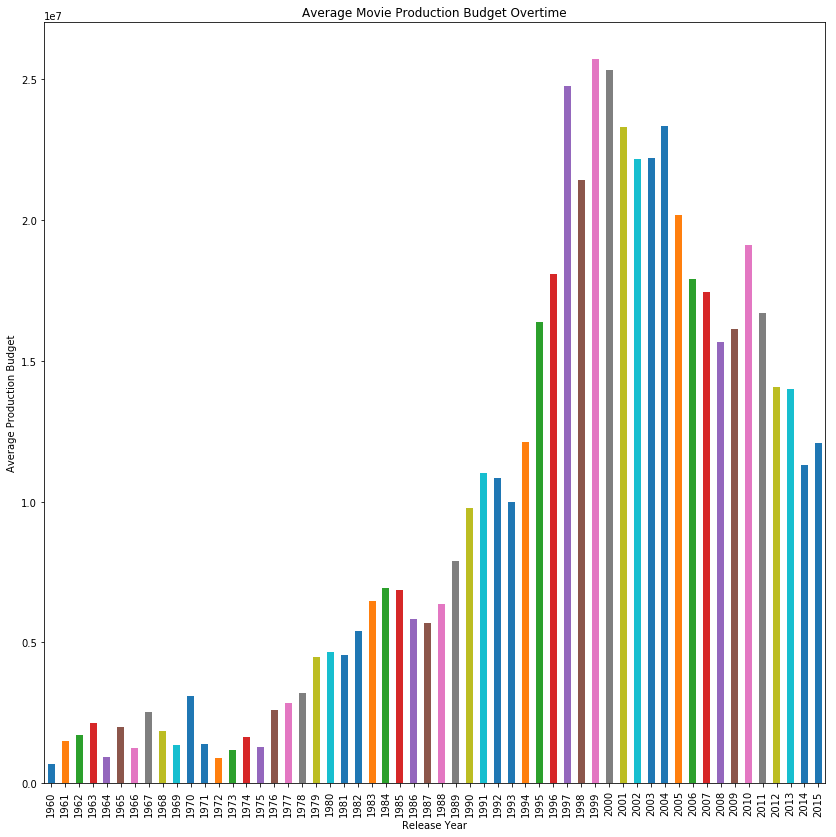

In [52]:
# To better explore the evolution of two variables, I will create a bar chart with average budget varible for y axis
# and release year for x axis.
avg_budget.plot(kind='bar', figsize=(14,14))
plt.xlabel('Release Year')
plt.ylabel('Average Production Budget')
plt.title('Average Movie Production Budget Overtime')



> **Finding**: The chart shows that the average budget of movie production has not constantly increased since 1960. It reached peak in 1999 and has fluctuated since then. 

### Research Question 3:  Does popularity of movie has positive correlation with revenue?`

The analysis will be based on a scatter plot with two variables: popularity and revenue.  

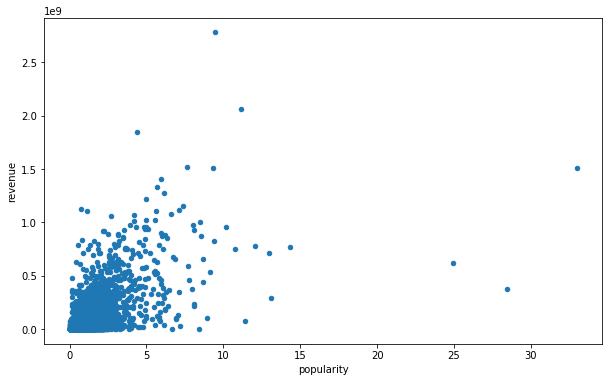

In [62]:
df.plot(x="popularity", y="revenue", kind="scatter", figsize=(10,6))

> **Finding**: The scatter plot does not reveal clear positive correlation between "popularity" and "revenue". The movie that made most revenue has relatively medium popularity. 

<a id='conclusions'></a>
## Conclusions

### Finding <br>
> 1) The movie "Avatar" directed by James Cameron made the most profit;<br> 2) Average movie production budget does not constantly increase overtime. The peak is in 1999; <br> 3) Revenue of a movie is not strictly dependant on its popularity. A movie that has medium popularity could generate maximum revenue. 

### Limitation <br>
> 1) The variable "vote_count" has certainly effect on the reliability of data related to movies. It's possible that movies with very few collected votes exist in the dataframe. I have ignored this factore in my analysis, which might make the findings less convincing; <br> 2) There is no obvious correlation discovered in the questions that I posed; <br> 3) I have not explored further variables such as budget_adj and revenue_adg since I do not know their meaning. 

## Resource
N/A